In [180]:
import numpy as np
import matplotlib.pyplot as plt


In [181]:
from scipy.misc import derivative

In [182]:
def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x) + 1/2*np.sin(np.exp(x)) + x

In [183]:
x = np.linspace(-7,5,10000)
X, Y = x, function(x)

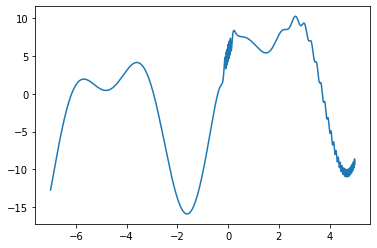

In [184]:
plt.plot(X, Y)

The following algorithm is supposed to iteratively find the minimum of a function. 

What problem does it have?

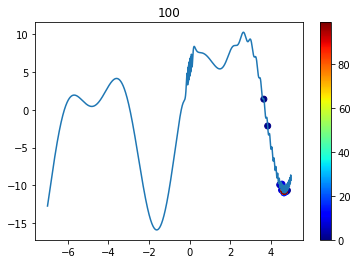

In [185]:
import matplotlib.cm as cm

def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x) + 1/2*np.sin(np.exp(x)) + x
x = np.linspace(-7,5,10000)
X, Y = x, function(x)

index = np.random.randint(0, len(x)) # randomly select an index to sample a point
point = x[index] # sample a point to start
derivative_in_point = derivative(function, point)
it = 0 # current iteration
max_it = 100 # set the max number of iterations to avoid infinite loops
points = [] # list of the points we have inspected
threshold = 0.01 # instead for waiting till we reach the 0 of the derivative, put a threshold
while np.abs(derivative_in_point)> threshold and it<max_it: 
    if derivative_in_point < 0: # the slope is negative
        x = x[index:] # since the slope is negative, the local minimum should be on the right
        index = np.random.randint(0, len(x)) # randomly select an index
        point = x[index] # sample the next point in the new interval
        points.append(point) # store for later
        derivative_in_point = derivative(function, point) # compute the derivative in the new point
    else:
        x = x[0:index+1] # the slope is positive, so the minimum should be on the left
        index = np.random.randint(0, len(x))
        point = x[index]
        points.append(point)
        derivative_in_point = derivative(function, point)
    it +=1
plt.figure()
plt.plot(X,Y)
plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
plt.title(str(it))
plt.colorbar()




## Exercise

1. Can you make the algorithm above to be implemented into a fuction `gradient_descent(function, X, max_it)`?

2. Run the experiment multiple times: do you notice any important difference at each iteration?

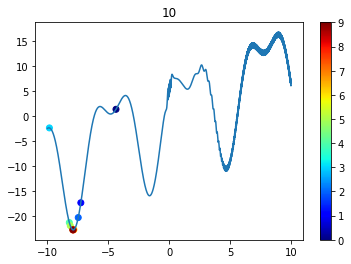

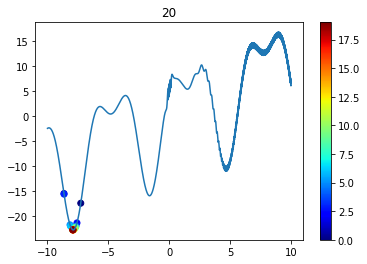

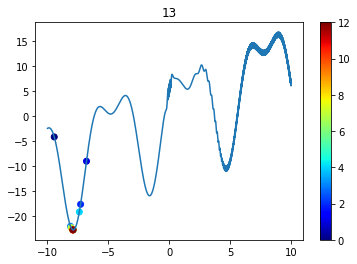

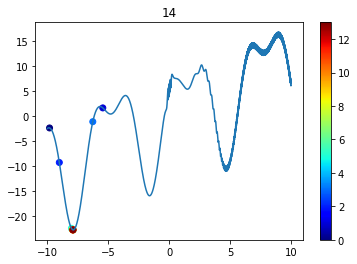

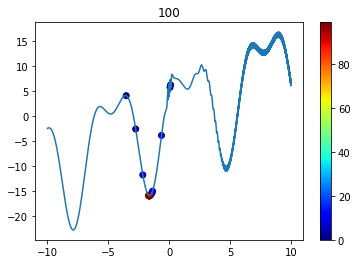

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
import matplotlib.cm as cm

def gradient_descent(function, x, max_it, threshold):
    """This function computes the gration descent of a given function

    Args:
        function (func): The function whose gradient descent will be computed
        x (float): The interval of evaluation
        max_it (int): The maximum number of iteration
        threshold (float): minimum allowed error

    Returns:
        (list,int): A tuple containing a list of evaluated points in the x-axis and the number of iterations
    """
    index = np.random.randint(0, len(x))
    point = x[index]
    deriv = derivative(function, point)

    it = 0 
    points = []
    
    while np.abs(deriv)> threshold and it<max_it:

        if deriv < 0:
            x = x[index:]
        else:
            x = x[0:index+1]
        
        index = np.random.randint(0, len(x))
        point = x[index]
        points.append(point)
        deriv = derivative(function, point)

        it +=1
        
    return points, it

def make_plot(X,Y,points,it):
    plt.figure()
    plt.plot(X,Y)
    plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
    plt.title(str(it))
    plt.colorbar()

def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x) + 1/2*np.sin(np.exp(x)) + x
    
%matplotlib inline
max_it = 100
threshold = 0.01
x = np.linspace(-10,10,10000)
X, Y = x, function(x)

for i in range(100):
    points,it = gradient_descent(function, X, max_it, threshold)
    if i%20==0:
        make_plot(X,Y,points,it)

## Integral

Scipy library also offers the possibility to compute the integral of a function.

In addition, the method `plt.fill_between(section, function(section)` colors the area under the curve of a generic function. 

Search the documentation of both and compute the area under the curve of the functions in the given intervals of the following exercises and plot them.



In [4]:
from scipy import integrate

### Example

interval = \[2,5\]

Function f(x) = x


In [221]:
from scipy import integrate
a, b = [2, 5]
def f(x):
    return x

result = integrate.quad(f, a, b)
result

(10.5, 1.1657341758564144e-13)

The return value is a tuple, with the first element holding the estimated value of the integral and the second element holding an upper bound on the error.

More in https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html .

In [222]:
area_under_the_curve = result[0]

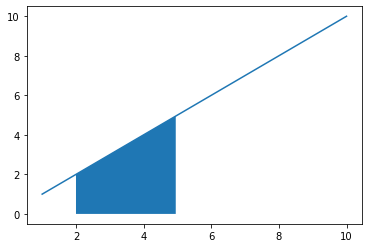

In [223]:
x = np.linspace(1,10, 100)
section = np.arange(2, 5, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))


1. interval = \[2,5\]

Function f(x) = 5

Compare the result computing the area by hand. Does it make sense?

Be careful: defining a constant function, you may end up with a single number instead of an array of the same size of the input. For this, I recommend to put in your function `constant_value*np.ones_like(x)`.

(15.0, 1.6653345369377348e-13)


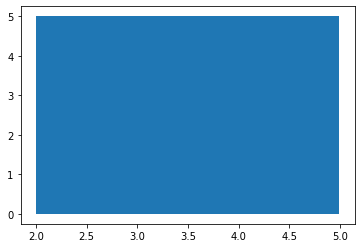

In [70]:
from scipy import integrate
a, b = [2, 5]        # the limits (a and b)
def f(x):
    return 5
#f = 5
result = integrate.quad(f, a, b)
result
print(result)

area_under_the_curve = result[0]

x = 5
section = np.arange(2, 5, 1/100)
plt.plot(x, f(x))
plt.fill_between(section,f(section))



2. interval = \[-1,1\]

Function f(x) = 1/x

(13.815510557964275, 1.908535343567167e-09)


<ipython-input-73-f59a84c1e871>:4: RuntimeWarning: divide by zero encountered in true_divide
  return 1/x


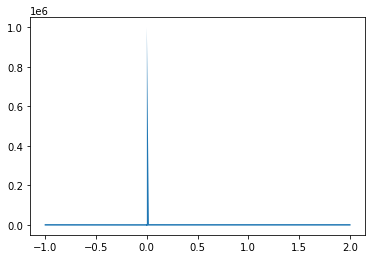

In [73]:
from scipy import integrate
a, b = [0.000001, 1]        # the limits (a and b)
def f(x):
    return 1/x

result = integrate.quad(f, a, b)
result
print(result)

area_under_the_curve = result[0]

x = np.linspace(-1,2, 1000)
section = np.arange(0.000001, 1, 1/50)
plt.plot(x, f(x))
plt.fill_between(section,f(section))

2. interval = \[-pi,pi\]

Function f(x) = sin(x)

(0.0, 4.3998892617846e-14)


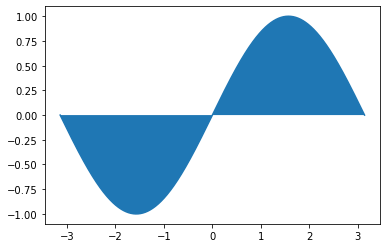

In [81]:
from scipy import integrate
x = np.linspace(-1*np.pi,1*np.pi, 1000)
y = np.sin(x)
#plt.plot(x,y)

a, b = [-1*np.pi,1*np.pi]        # the limits (a and b)

def f(x):
    return np.sin(x)

result = integrate.quad(f, a, b)
result
print(result)

area_under_the_curve = result[0]

section = np.arange(-1*np.pi,1*np.pi, 1/100)
plt.plot(x, f(x))
plt.fill_between(section,f(section))

3. interval = \[-pi,pi\]

Function f(x) = cos(x)


(2.615901373506474e-16, 4.471737093238828e-14)


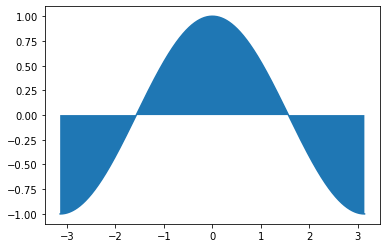

In [82]:
from scipy import integrate
x = np.linspace(-1*np.pi,1*np.pi, 1000)
y = np.cos(x)
#plt.plot(x,y)

a, b = [-1*np.pi,1*np.pi]        # the limits (a and b)

def f(x):
    return np.cos(x)

result = integrate.quad(f, a, b)
result
print(result)

area_under_the_curve = result[0]

section = np.arange(-1*np.pi,1*np.pi, 1/100)
plt.plot(x, f(x))
plt.fill_between(section,f(section))

2. interval = \[-pi,pi\]

Function f(x) = sin(x) - cos(2x)

(5.231802747012948e-16, 4.085699506880975e-09)


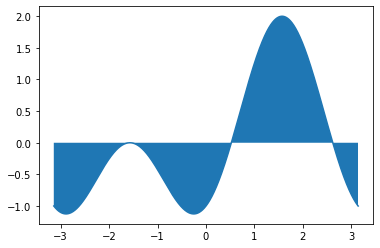

In [83]:
from scipy import integrate
x = np.linspace(-1*np.pi,1*np.pi, 1000)
y = np.sin(x) - np.cos(2*x)

#plt.plot(x,y)

a, b = [-1*np.pi,1*np.pi]        # the limits (a and b)

def f(x):
    return np.sin(x) - np.cos(2*x)

result = integrate.quad(f, a, b)
result
print(result)

area_under_the_curve = result[0]

section = np.arange(-1*np.pi,1*np.pi, 1/100)
plt.plot(x, f(x))
plt.fill_between(section,f(section))